In [1]:
import numpy as np
import pandas as pd
import os
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time
import pygmo as pg
import math

In [2]:
dataset = pd.read_csv("Rastrigin_dataset_data.csv")
Rastrigin_dataset = dataset["val"].tolist()

In [3]:
D = 500
f_bias = -330
lower_bound = -5
upper_bound = 5

In [4]:
def func(x):
    F = 0
    for i in range(D - 1):
         z = x[i] - Rastrigin_dataset[i]
         F += z ** 2 - 10 * math.cos(2 * math.pi * z) + 10
    func = F + f_bias
    return func

In [5]:
class RAS:
    def __init__(self,xmin,xmax,D,f_bias):
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.dimension = D
        self.fitness_per_eval = []
        self.glob_opt = f_bias

    def fitness(self, x):
        #result = abs(func(x)-f_bias)
        result = func(x)
        return [result]

    def get_bounds(self):
        x_min = self.lower_bound * np.ones(self.dimension)
        x_max = self.upper_bound * np.ones(self.dimension)
        return x_min, x_max

In [6]:
def compute(func):
    global curve
    global start_time
    global end_time
    start_time = time.time()
    algo = pg.algorithm(pg.simulated_annealing(Ts=20., Tf=1e-5))
    algo.set_verbosity(1)
    popsize = 1
    prob = pg.problem(RAS(lower_bound,upper_bound,D,f_bias))
    pop = pg.population(prob, popsize)
    extract_algo = algo.extract(pg.simulated_annealing)
    pop = algo.evolve(pop)
    end_time = time.time()
    
    log = extract_algo.get_log()
    curve = [x[2] for x in log]
    #niter = log[-1][0]
    niter = pop.problem.get_fevals()
    print("Best position: ", pop.champion_x)
    print("Best Fitness",pop.champion_f[0])

In [7]:
compute(func)

Best position:  [ 3.84672538  4.32371417 -2.82158229  0.64705149  4.33805883  2.44090604
 -3.45892941  2.33714531  3.98002235  4.28973838  1.3793206   3.22518547
 -0.02346963  3.63251108  4.61392944  0.99568309  1.61051896 -4.72497208
 -2.69778421  2.03117274 -3.20491194  2.81035872 -1.68276188 -3.22972679
  4.41141967 -0.27892467 -4.422022    1.49216974  0.73937612  2.1785091
 -3.27841636  2.78380923  3.59550113 -4.71900309  1.51235723 -3.6042136
 -3.20334634  0.46852581 -2.03006942 -0.39891626 -3.77079364  4.96793781
  4.32145182  3.35439906 -4.86588877  3.83693979  0.21241946 -4.27480694
  3.68379481  3.79233796 -4.08481213  4.41539907 -2.35458306  1.24217915
  0.48671924 -2.25371463 -3.34880125  2.67639083 -0.52972253 -3.83067812
  3.02212156 -3.09239022  4.19512583 -2.34291114  3.46896737  2.07137503
  0.26900981 -2.11834841  1.34706056  0.28669365  2.42015352  3.49878997
  1.38969801  0.1159229  -4.67850366 -2.17020733  4.1593981   3.48521791
  3.24541699 -3.37728525  4.70004631 

In [8]:
comp_time = end_time-start_time
comp_time

186.20965576171875

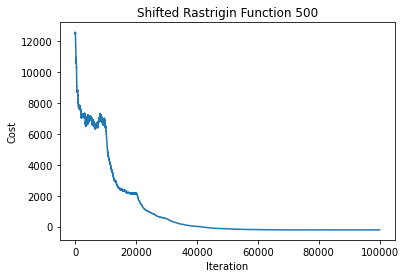

In [10]:
plt.plot(curve)
plt.title("Shifted Rastrigin Function 500")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()